In [1]:
# Bibliotecas para trabalhar com os Dados :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chamando o dataset
data_covid_09 = pd.read_csv('Covid-global-semana3.csv')

In [3]:
# Passando as colunas do idioma inglês para o português
data_covid_09.columns = ["Dia", "UF", "País", "Região", "Confirmados", "Confirmados_Acumula", "Mortes", "Mortes_Acumula"]
data_covid_09

# Selecionando o país-alvo
data_covid_sem = data_covid_09[data_covid_09['País']=='Brazil']
data_covid_sem

# Reduzindo o tempo dos dados para 1 semana
data_covid_semana_br = data_covid_sem.tail(7)
data_covid_semana_br

,Dia,UF,País,Região,Confirmados,Confirmados_Acumula,Mortes,Mortes_Acumula
2984,2020-06-15T00:00:00Z,BR,Brazil,AMRO,21704,850514,892,42720
2985,2020-06-16T00:00:00Z,BR,Brazil,AMRO,17110,867624,612,43332
2986,2020-06-17T00:00:00Z,BR,Brazil,AMRO,20647,888271,627,43959
2987,2020-06-18T00:00:00Z,BR,Brazil,AMRO,34918,923189,1282,45241
2988,2020-06-19T00:00:00Z,BR,Brazil,AMRO,32188,955377,1269,46510
2989,2020-06-20T00:00:00Z,BR,Brazil,AMRO,22765,978142,1238,47748
2990,2020-06-21T00:00:00Z,BR,Brazil,AMRO,54771,1032913,1206,48954


In [4]:
data_covid_semana_br.describe()

,Confirmados,Confirmados_Acumula,Mortes,Mortes_Acumula
count,7.000000,7.000000e+00,7.000000,7.000000
mean,29157.571429,9.280043e+05,1018.000000,45494.857143
std,12989.792516,6.521929e+04,302.774393,2340.723565
min,17110.000000,8.505140e+05,612.000000,42720.000000
25%,21175.500000,8.779475e+05,759.500000,43645.500000
50%,22765.000000,9.231890e+05,1206.000000,45241.000000
75%,33553.000000,9.667595e+05,1253.500000,47129.000000
max,54771.000000,1.032913e+06,1282.000000,48954.000000


In [5]:
covid_heatmap = data_covid_sem.corr()
covid_heatmap

,Confirmados,Confirmados_Acumula,Mortes,Mortes_Acumula
Confirmados,1.000000,0.913963,0.923176,0.929678
Confirmados_Acumula,0.913963,1.000000,0.828961,0.993438
Mortes,0.923176,0.828961,1.000000,0.872351
Mortes_Acumula,0.929678,0.993438,0.872351,1.000000


# Iniciando criação de gráficos: 

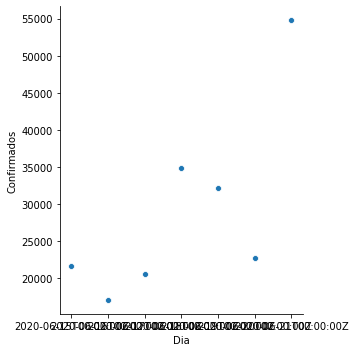

In [6]:
sns.relplot(x="Dia", y="Confirmados", data=data_covid_semana_br)

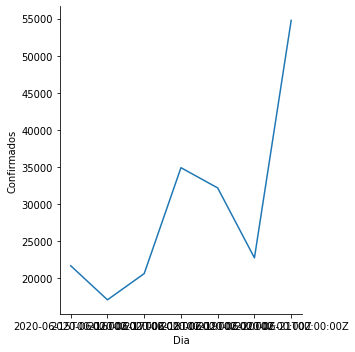

In [7]:
sns.relplot(x="Dia", y="Confirmados", estimator=None, kind="line", data=data_covid_semana_br);

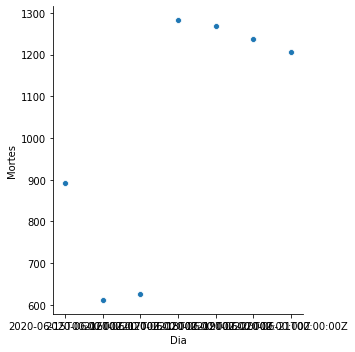

In [8]:
sns.relplot(x="Dia", y="Mortes", data=data_covid_semana_br)

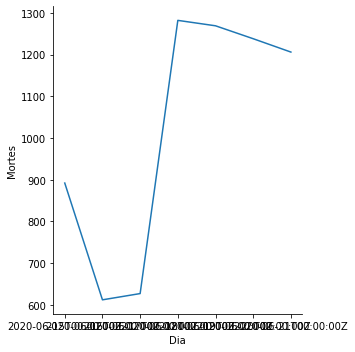

In [9]:
sns.relplot(x="Dia", y="Mortes", estimator=None, kind="line", data=data_covid_semana_br);

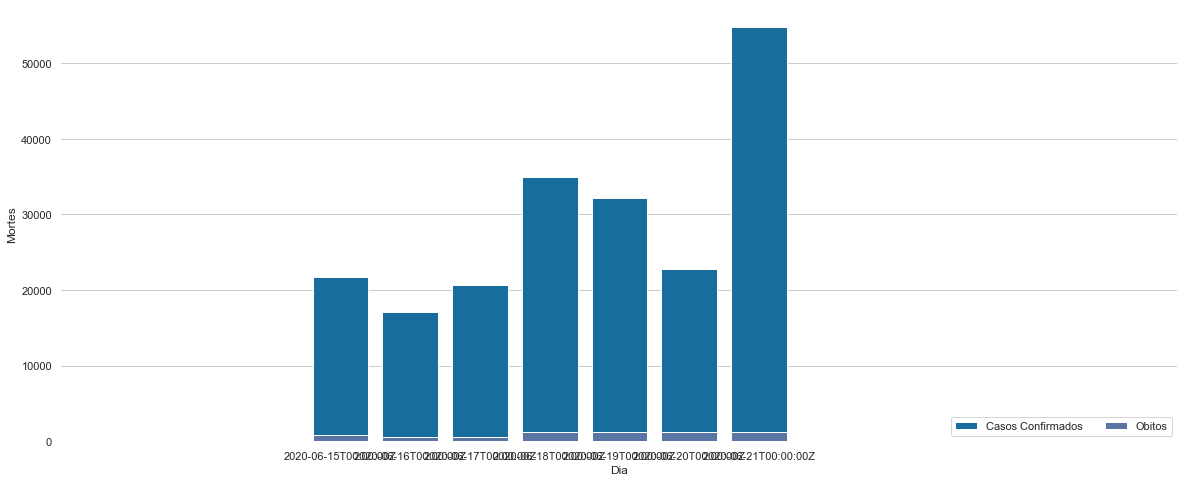

In [10]:
sns.set(style="whitegrid")

# Inicializando figura de matplotlib
f, ax = plt.subplots(figsize=(20,8))

# Plotagem de casos confirmados:
sns.set_color_codes("colorblind")
sns.barplot(x="Dia", y="Confirmados", data=data_covid_semana_br,
           label="Casos Confirmados", color="b")

# Plotagem de obitos registrados:
sns.set_color_codes("deep")
sns.barplot(x="Dia", y="Mortes", data=data_covid_semana_br,
           label="Obitos", color="b")

# Add uma legenda e informações:
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-4,12), ylabel="Mortes", xlabel="Dia")
sns.despine(left=True,bottom=True)

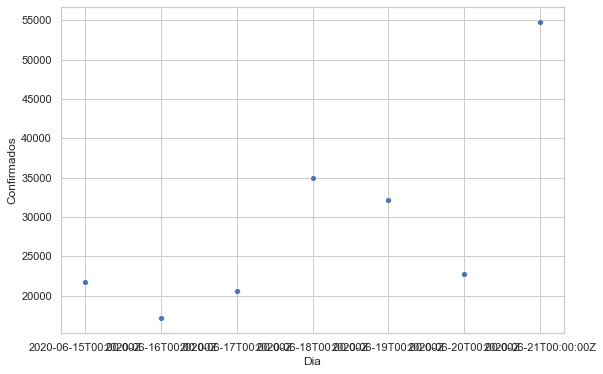

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data_covid_semana_br["Dia"], y=data_covid_semana_br["Confirmados"])

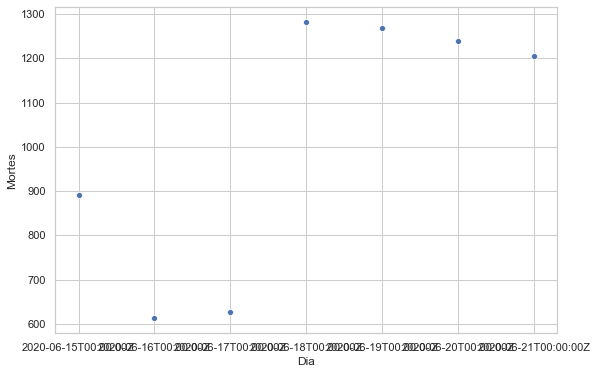

In [12]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data_covid_semana_br["Dia"], y=data_covid_semana_br["Mortes"])

# Tentaremos melhorar a qualidade dos gráficos :

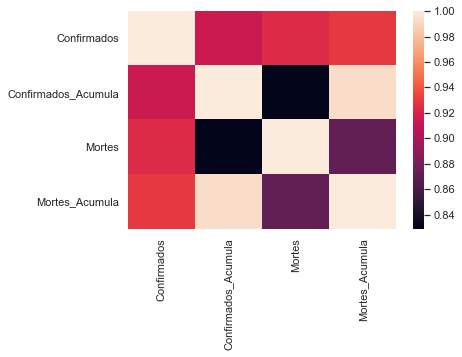

In [13]:
sns.heatmap(covid_heatmap)

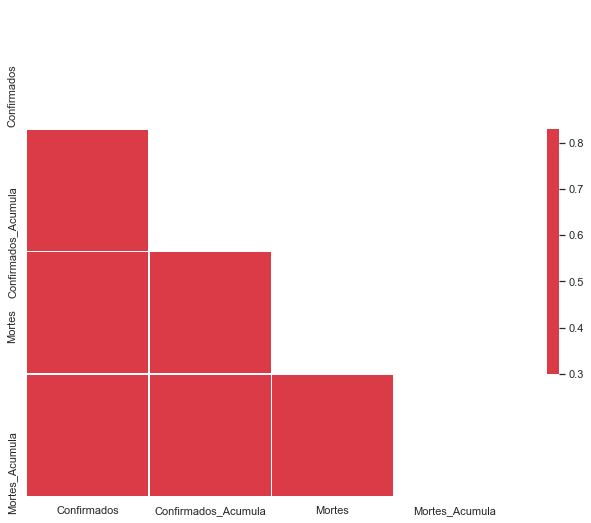

In [14]:
from string import ascii_letters

mask = np.triu(np.ones_like(covid_heatmap, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(covid_heatmap, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

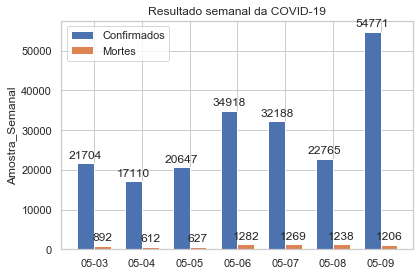

In [15]:
import matplotlib

#Projetando o conteúdo das barras:
dias_semana = ["05-03", "05-04", "05-05", "05-06", "05-07", "05-08", "05-09"]
x = np.arange(len(dias_semana))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_covid_semana_br['Confirmados'], width, label='Confirmados')
rects2 = ax.bar(x + width/2, data_covid_semana_br['Mortes'], width, label='Mortes')

# Mudanças extras {Títulos, leitura das variaveis X e Y, dimensionamento}.
ax.set_ylabel('Amostra_Semanal')
ax.set_title('Resultado semanal da COVID-19')
ax.set_xticks(x)
ax.set_xticklabels(dias_semana)
plt.rcParams['figure.figsize'] = (11,7)
ax.legend()

def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.rcParams['figure.figsize'] = (12,6)
plt.show()

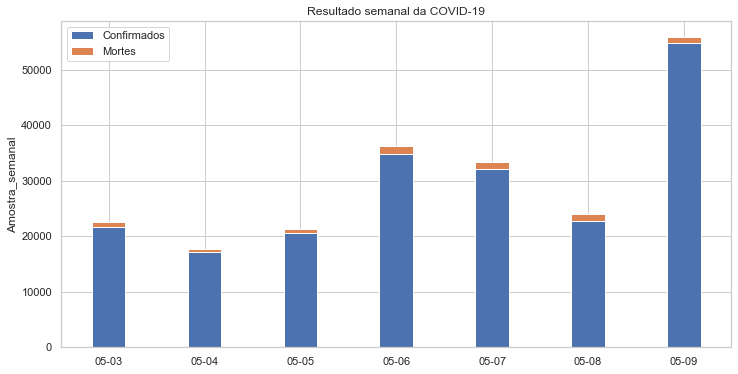

In [16]:
dias_semana = ["05-03", "05-04", "05-05", "05-06", "05-07", "05-08", "05-09"]
width = 0.35
fig, ax = plt.subplots()

ax.bar(dias_semana, data_covid_semana_br['Confirmados'], width, label='Confirmados')
ax.bar(dias_semana, data_covid_semana_br['Mortes'], width, bottom=data_covid_semana_br['Confirmados'],
       label='Mortes')

ax.set_ylabel('Amostra_semanal')
ax.set_title('Resultado semanal da COVID-19')
ax.legend()

plt.rcParams['figure.figsize'] = (12,6)
plt.show()

In [17]:
data_covid_semana_br

,Dia,UF,País,Região,Confirmados,Confirmados_Acumula,Mortes,Mortes_Acumula
2984,2020-06-15T00:00:00Z,BR,Brazil,AMRO,21704,850514,892,42720
2985,2020-06-16T00:00:00Z,BR,Brazil,AMRO,17110,867624,612,43332
2986,2020-06-17T00:00:00Z,BR,Brazil,AMRO,20647,888271,627,43959
2987,2020-06-18T00:00:00Z,BR,Brazil,AMRO,34918,923189,1282,45241
2988,2020-06-19T00:00:00Z,BR,Brazil,AMRO,32188,955377,1269,46510
2989,2020-06-20T00:00:00Z,BR,Brazil,AMRO,22765,978142,1238,47748
2990,2020-06-21T00:00:00Z,BR,Brazil,AMRO,54771,1032913,1206,48954


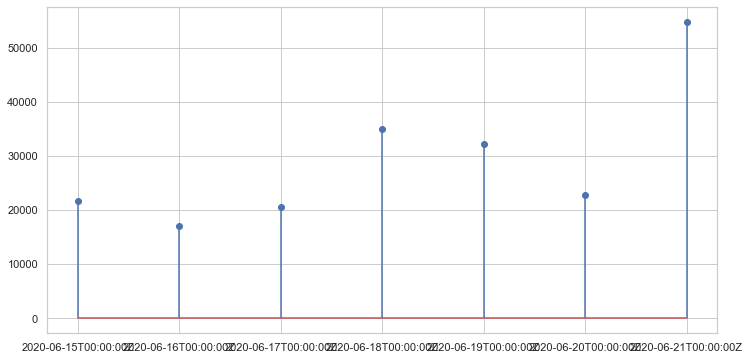

In [18]:
#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/stem_plot.html#sphx-glr-gallery-lines-bars-and-markers-stem-plot-py

x = data_covid_semana_br['Dia']
y = data_covid_semana_br['Confirmados']

plt.stem(x, y, use_line_collection=True)
plt.show()

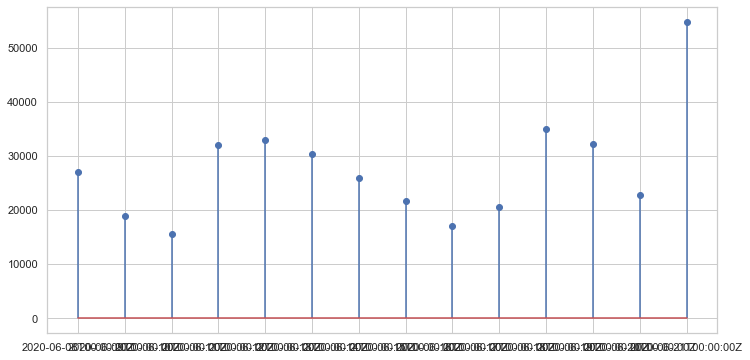

In [19]:
covid_semana_br = data_covid_sem.tail(14)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
##2 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.stem(X, Y, use_line_collection=True)
plt.show()

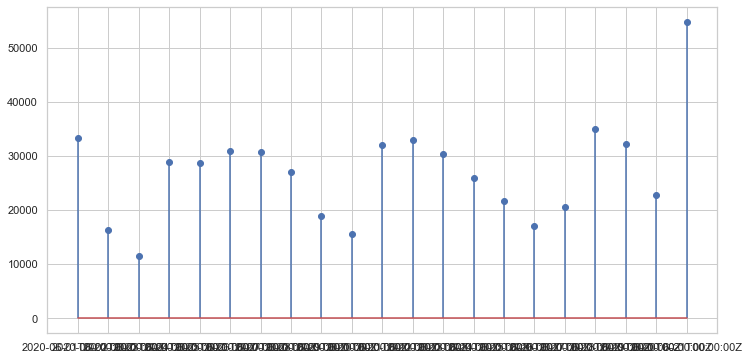

In [20]:
covid_semana_br = data_covid_sem.tail(21)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
##3 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.stem(X, Y, use_line_collection=True)
plt.show()

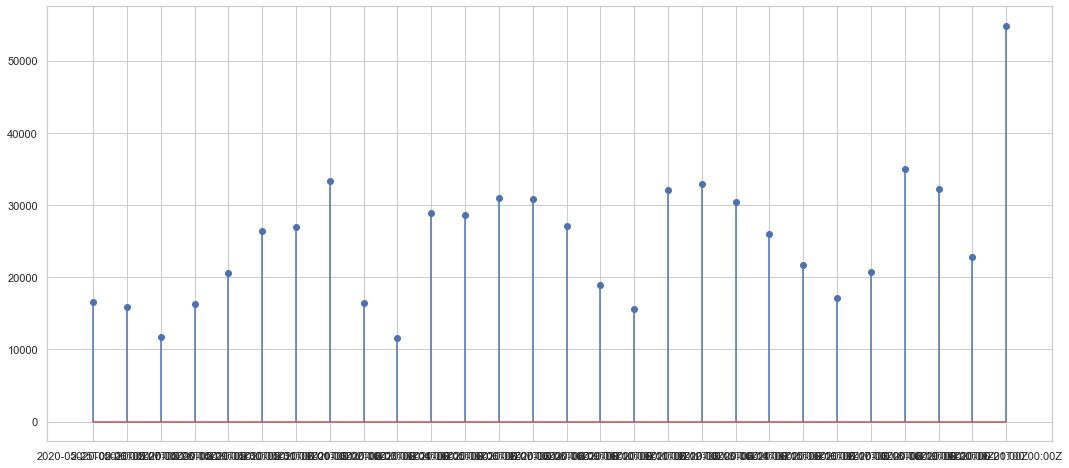

In [21]:
covid_semana_br = data_covid_sem.tail(28)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
## 4 semanas de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.rcParams['figure.figsize'] = (18,8)
plt.stem(X, Y, use_line_collection=True)
plt.show()

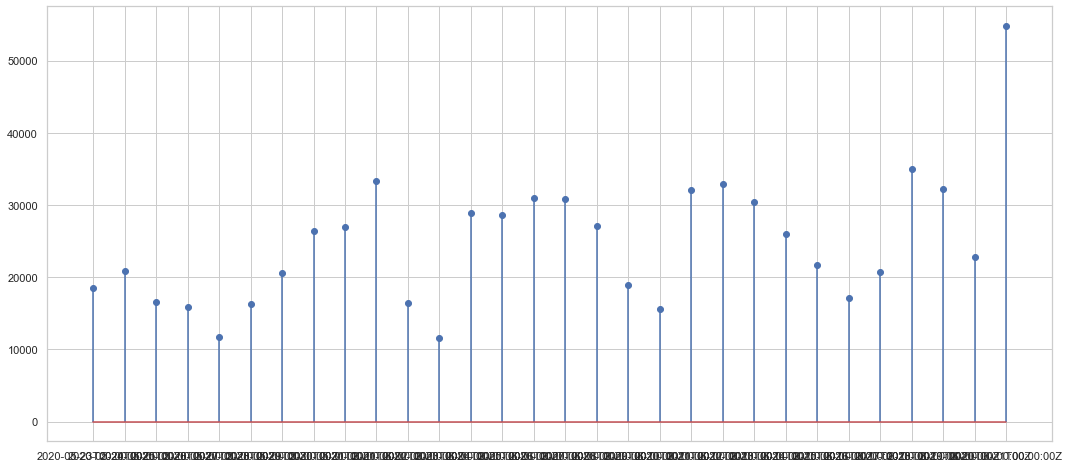

In [22]:
covid_semana_br = data_covid_sem.tail(30)
covid_semana_br
#Novo DataFrame para visualizar com o exemplo anterior :
## 1 mês de dados

X = covid_semana_br['Dia']
Y = covid_semana_br['Confirmados']

plt.rcParams['figure.figsize'] = (18,8)
plt.stem(X, Y, use_line_collection=True)
plt.show()

# Vejamos o que fazer com o Histograma {visto que ele é o + simples e fácil de entender}

(array([2., 0., 0., 0., 1., 0., 0., 0., 1., 3.]),
 array([ 612.,  679.,  746.,  813.,  880.,  947., 1014., 1081., 1148.,
        1215., 1282.]),
 <a list of 10 Patch objects>)

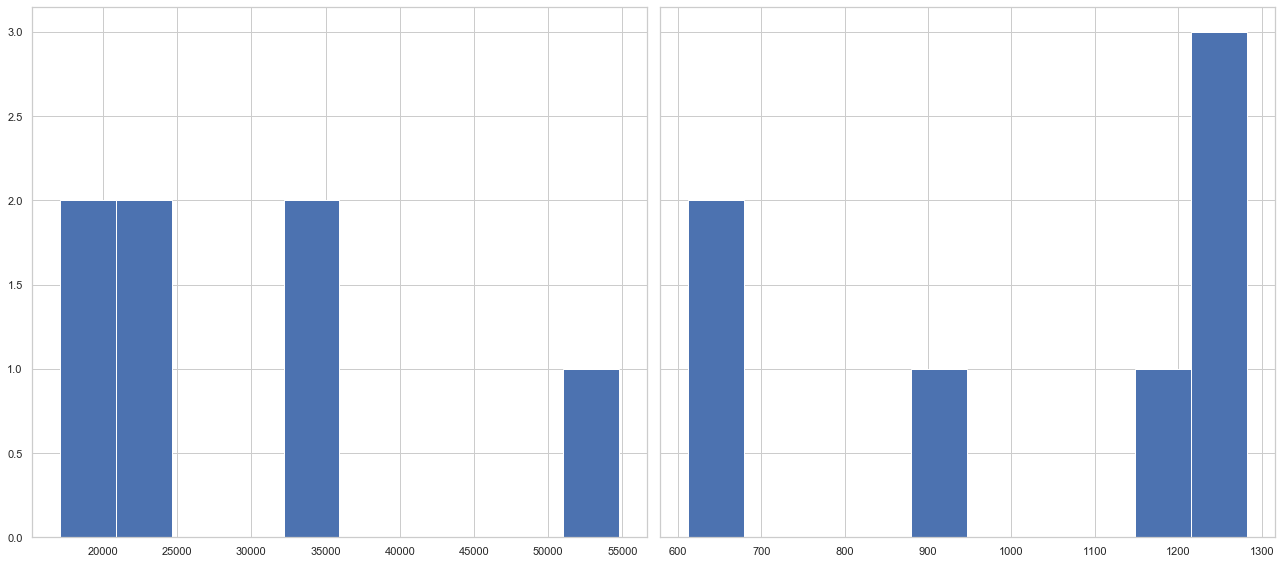

In [23]:
# https://matplotlib.org/3.2.1/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py
# vamos importar +1 biblioteca específica do matplotlib
from matplotlib.ticker import PercentFormatter

# vamos atribuir um prazo de 7 dias para variável covid_semana_br :
covid_semana_br = data_covid_sem.tail(7)
covid_semana_br

# gerando uma distribuição normal, com coord.: (x=0,y=5)
var1 = covid_semana_br['Confirmados']
var2 = covid_semana_br['Mortes']

# configurações :
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax.set_ylabel('Amostra semanal')
ax.set_title('Resultado semanal da COVID-19')

# plotando os gráficos :
axs[0].hist(var1)
axs[1].hist(var2)

# Vamos tentar incluir o Aprendizado de Máquina aqui e depois analisá-lo !

# Primeiramente, vamos utilizar a 'Árvore de Decisão' p/ análises.

In [24]:
#Chamando redes neurais para destrinchar os dados!
from sklearn.ensemble import RandomForestClassifier
Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [25]:
pesquisa_covid = data_covid_sem.tail(30)
pesquisa_covid

,Dia,UF,País,Região,Confirmados,Confirmados_Acumula,Mortes,Mortes_Acumula
2961,2020-05-23T00:00:00Z,BR,Brazil,AMRO,18508,310087,1188,20047
2962,2020-05-24T00:00:00Z,BR,Brazil,AMRO,20803,330890,1001,21048
2963,2020-05-25T00:00:00Z,BR,Brazil,AMRO,16508,347398,965,22013
2964,2020-05-26T00:00:00Z,BR,Brazil,AMRO,15813,363211,653,22666
2965,2020-05-27T00:00:00Z,BR,Brazil,AMRO,11687,374898,807,23473
2966,2020-05-28T00:00:00Z,BR,Brazil,AMRO,16324,391222,1039,24512
2967,2020-05-29T00:00:00Z,BR,Brazil,AMRO,20599,411821,1086,25598
2968,2020-05-30T00:00:00Z,BR,Brazil,AMRO,26417,438238,1156,26754
2969,2020-05-31T00:00:00Z,BR,Brazil,AMRO,26928,465166,1124,27878
2970,2020-06-01T00:00:00Z,BR,Brazil,AMRO,33274,498440,956,28834


In [26]:
#Então,vamos usar as variáveis 'Confirmados' e 'Mortes' para estudos iniciais.
alvo = ['Confirmados', 'Mortes']
x = pesquisa_covid[alvo]
y = pesquisa_covid['Confirmados']

In [27]:
#Vamos passar a variável de pesquisa para outra variavel para submetê-la aos testes de decisão.
x_forecast = x
x_forecast

,Confirmados,Mortes
2961,18508,1188
2962,20803,1001
2963,16508,965
2964,15813,653
2965,11687,807
2966,16324,1039
2967,20599,1086
2968,26417,1156
2969,26928,1124
2970,33274,956


In [28]:
#Veja o que temos a respeito do modelo em estudo:
Modelo.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
#Montando uma matriz com as informações inputidas(Confirmados)
prevesion = Modelo.predict(x_forecast)
prevesion

array([18508, 20803, 16508, 15813, 11687, 16324, 20599, 26417, 26928,
       33274, 16409, 11598, 28936, 28633, 30925, 30830, 27075, 18912,
       15654, 32091, 32913, 30412, 25982, 21704, 17110, 20647, 34918,
       32188, 22765, 54771], dtype=int64)

In [30]:
#Criados as variaveis de estudo, vamos importar o 'treino e teste':
from sklearn.model_selection import train_test_split

#Implicando os dados no algoritmo de análise:
x_treinar, x_validar, y_treinar, y_validar = train_test_split(x, y, test_size=0.5)

#dividindo os arrays meio-a-meio:
x_treinar.shape, x_validar.shape, y_treinar.shape, y_validar.shape

((15, 2), (15, 2), (15,), (15,))

In [31]:
#Para validar os comandos de testagem, usamos:
Modelo.fit(x_treinar, x_validar)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
#array dos dados que temos em 'x_treinar'
Modelo.predict(x_treinar)

array([[32091,  1272],
       [20803,  1001],
       [33274,   956],
       [30412,  1239],
       [30925,  1473],
       [26417,  1156],
       [15813,   653],
       [54771,  1206],
       [28633,  1349],
       [27075,   904],
       [16324,  1039],
       [22765,  1238],
       [26928,  1124],
       [16409,   480],
       [20599,  1086]], dtype=int64)

In [33]:
#array dos dados que temos em 'x_validar'
Modelo.predict(x_validar)

array([[26928,  1124],
       [22765,  1238],
       [15813,   653],
       [16409,   480],
       [20803,  1001],
       [16409,   480],
       [20599,  1086],
       [20803,  1001],
       [16409,   480],
       [16324,  1039],
       [22765,  1238],
       [16409,   480],
       [16409,   480],
       [54771,  1206],
       [26417,  1156]], dtype=int64)

In [34]:
#Passando uma parâmetro para checar a validação dos dados nos arrays
parameter = Modelo.predict(x_validar)
np.mean(x_validar == parameter)

Confirmados    0.0
Mortes         0.0
dtype: float64

# Usando um pedaço de código antigo, vejamos a acurácia obtidas em 'n' testes:

In [35]:
from sklearn.model_selection import KFold
result = []
for repete in range(10):
    print("Num. Repe.:", repete)
    kf = KFold(3, shuffle=True, random_state=repete)

#Criando um loop for para obter mais resultados:
    for dados_treinados, dados_validados in kf.split(x):
        print("Treinados:", dados_treinados.shape[0])
        print("Validados:", dados_validados.shape[0])

        #Chamando as variaveis de treino:
        x_treino, x_valido = x.iloc[dados_treinados], x.iloc[dados_validados]
        y_treino, y_valido = y.iloc[dados_treinados], y.iloc[dados_validados]

        #Copiando codigos antigos
        Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        Modelo.fit(x_treinar, y_treinar)
        param = Modelo.predict(x_valido)
        acu = np.mean(y_valido == param)
        
        #Por fim, o resultado:
        result.append(acu)
        print("Acurácia:", acu)
        print()

Num. Repe.: 0
Treinados: 20
Validados: 10
Acurácia: 0.7

Treinados: 20
Validados: 10
Acurácia: 0.3

Treinados: 20
Validados: 10
Acurácia: 0.5

Num. Repe.: 1
Treinados: 20
Validados: 10
Acurácia: 0.5

Treinados: 20
Validados: 10
Acurácia: 0.6

Treinados: 20
Validados: 10
Acurácia: 0.4

Num. Repe.: 2
Treinados: 20
Validados: 10
Acurácia: 0.3

Treinados: 20
Validados: 10
Acurácia: 0.6

Treinados: 20
Validados: 10
Acurácia: 0.6

Num. Repe.: 3
Treinados: 20
Validados: 10
Acurácia: 0.5

Treinados: 20
Validados: 10
Acurácia: 0.7

Treinados: 20
Validados: 10
Acurácia: 0.3

Num. Repe.: 4
Treinados: 20
Validados: 10
Acurácia: 0.6

Treinados: 20
Validados: 10
Acurácia: 0.4

Treinados: 20
Validados: 10
Acurácia: 0.5

Num. Repe.: 5
Treinados: 20
Validados: 10
Acurácia: 0.6

Treinados: 20
Validados: 10
Acurácia: 0.6

Treinados: 20
Validados: 10
Acurácia: 0.3

Num. Repe.: 6
Treinados: 20
Validados: 10
Acurácia: 0.5

Treinados: 20
Validados: 10
Acurácia: 0.7

Treinados: 20
Validados: 10
Acurácia: 0.3


# Vimos então a acurácia obtida em alguns testes breves com um modelo bem reduzido dos dados que costumamos utilizar... O que é bom ✌️🤓

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda-navigator\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([ 6.,  0.,  4.,  0.,  0.,  7.,  0., 10.,  0.,  3.]),
 array([0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 ]),
 <a list of 10 Patch objects>)

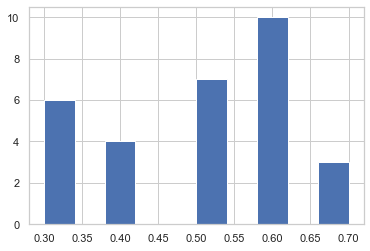

In [36]:
#Faremos uma plotagem para comparação de dados:
%matplotlib inline
%pylab inline
pylab.hist(result)

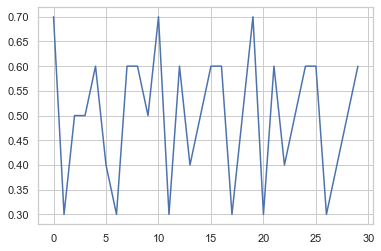

In [37]:
pylab.plot(result)

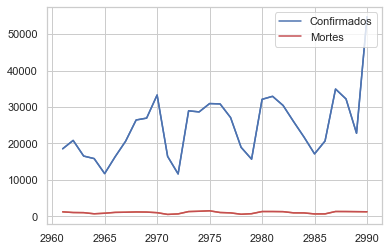

In [38]:
pylab.plot(x_forecast)
pylab.plot(x_forecast['Confirmados'], '-b', label='Confirmados')
pylab.plot(x_forecast['Mortes'], '-r', label='Mortes')
pylab.legend(loc='upper right')

# Uma das conclusões que podemos obter é : O alto grau de variabilidade dos dados (tanto de 'Confirmados' quanto de 'Mortes') 📊📈📉; demonstra que, prever, os próximos picos da doença 📅 tornem-se um tanto quanto inviáveis!

## Posso dizer agora que ... o modelo foi concluído com exitô ☕😎💻

## Referências para criação deste modelo estatístico :

## Link para 📥 os dados do Covid-19 : https://covid19.who.int/

## Link para o site dos emojis ✌️🧐 : https://emojikeyboard.top/pt/